In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

Create a transform to normalize MNIST data

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

In [4]:
mnist_train_dataset = datasets.MNIST('mnist_train_dataset', download=True, transform=transform, train=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5172863.53it/s]


Extracting mnist_train_dataset/MNIST/raw/train-images-idx3-ubyte.gz to mnist_train_dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 152216.28it/s]


Extracting mnist_train_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_train_dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1430720.85it/s]


Extracting mnist_train_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_train_dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3516155.18it/s]

Extracting mnist_train_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_train_dataset/MNIST/raw



create a data loader

In [5]:
mnist_train_data_loader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=64, shuffle=True)

create data iterator

In [6]:
train_data_iterator = iter(mnist_train_data_loader)

In [7]:
type(train_data_iterator)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [8]:
train_images, train_labels = next(train_data_iterator)

In [9]:
train_images.shape

torch.Size([64, 1, 28, 28])

In [10]:
train_labels.shape

torch.Size([64])

In [11]:
train_images[0].device

device(type='cpu')

In [12]:
print(torch.isnan(train_images[0]).any())
print(torch.isinf(train_images[0]).any())

tensor(False)
tensor(False)


In [13]:
train_labels

tensor([7, 4, 2, 7, 6, 7, 3, 6, 2, 7, 1, 2, 0, 6, 1, 3, 3, 6, 8, 3, 6, 5, 2, 1,
        6, 3, 5, 0, 1, 9, 0, 7, 9, 6, 3, 4, 4, 3, 8, 6, 4, 5, 6, 6, 4, 2, 6, 6,
        6, 4, 2, 0, 5, 2, 9, 3, 0, 5, 0, 8, 0, 3, 2, 3])

view an image

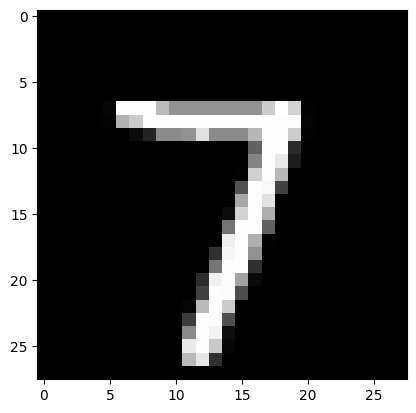

In [14]:
plt.imshow(train_images[0].numpy().squeeze(), cmap='gray')

Build a simple neural network

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # defining Neural Network layers

        # inputs to hidden layer
        self.hidden_layer = nn.Linear(784, 256)

        # output layer, 10 units for each label
        self.output_layer = nn.Linear(256, 10)

    def forward(self, x):
        # pass the input tensor through each of our operations

        # hidden layer with relu activation
        x = F.relu(self.hidden_layer(x))

        # output layer with softmax activation
        x = F.softmax(self.output_layer(x), dim=1)

        return x

In [16]:
model = NeuralNetwork()

In [17]:
model

NeuralNetwork(
  (hidden_layer): Linear(in_features=784, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=10, bias=True)
)

In [18]:
model.hidden_layer.weight.data.fill_(0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Define a loss function

In [19]:
criterion = nn.CrossEntropyLoss()

In [20]:
train_images.shape

torch.Size([64, 1, 28, 28])

In [21]:
train_images_batch = train_images.view(train_images.shape[0], -1)

In [22]:
train_images_batch.shape

torch.Size([64, 784])

In [23]:
output_predictions = model(train_images_batch)

In [24]:
loss = criterion(output_predictions, train_labels)

In [25]:
loss

tensor(2.3033, grad_fn=<NllLossBackward0>)

Train the model

Define an optimizer

In [26]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Train using training images

In [30]:
epochs = 8
for e in range(epochs):
    training_loss = 0
    for images, labels in mnist_train_data_loader:
        # Flatten the images
        image = images.view(images.shape[0], -1)

        # make the gradient values to 0
        optimizer.zero_grad()

        # get output predictions from images
        output_predictions = model(image)

        # calculate loss
        loss = criterion(output_predictions, labels)

        # do a backward pass to find the gradient
        loss.backward()

        # update the weights of the parameters
        optimizer.step()

        training_loss += loss.item()

    else:
        print(f"Training loss for epoch {e}: {training_loss/len(mnist_train_data_loader)}")

Training loss for epoch 0: 2.2048625268661644
Training loss for epoch 1: 1.8926002525571566
Training loss for epoch 2: 1.7450766882408402
Training loss for epoch 3: 1.6882055680126524
Training loss for epoch 4: 1.6674112667407055
Training loss for epoch 5: 1.6562004408348343
Training loss for epoch 6: 1.648905526473324
Training loss for epoch 7: 1.6436491705207175


Inference on a digit

In [32]:
images, labels = next(iter(mnist_train_data_loader))

In [35]:
infer_img = images[0].view(1,784)

In [36]:
with torch.no_grad():
    output_prediction = model(infer_img)

In [37]:
output_prediction.shape

torch.Size([1, 10])

In [41]:
probabilities = output_prediction.data.numpy().squeeze()
probabilities.round(2)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:893: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


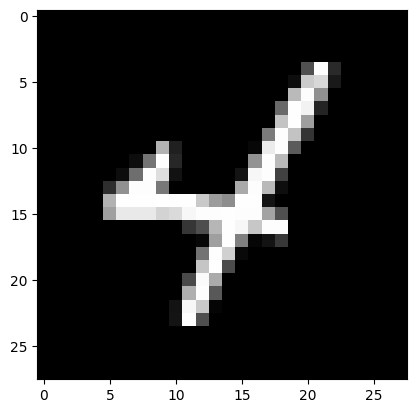

In [40]:
plt.imshow(infer_img.resize(1, 28, 28).numpy().squeeze(), cmap='gray')